In [78]:
import numpy as np
import mne
from mne.io import concatenate_raws, read_raw_fif
import mne.viz
from os import walk

In [79]:
files = []
path = '../../OpenMIIR-RawEEG_v1/'
for (dirpath, dirnames, filenames) in walk(path):
    new_names = [dirpath+f for f in filenames]
    files.extend(new_names)
    break

In [80]:
raws = [read_raw_fif(f, preload=True) for f in files]

Opening raw data file ../../OpenMIIR-RawEEG_v1/P13-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
    Range : 0 ... 2511914 =      0.000 ...  4906.082 secs
Ready.
Reading 0 ... 2511914  =      0.000 ...  4906.082 secs...
Opening raw data file ../../OpenMIIR-RawEEG_v1/P12-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
    Range : 0 ... 2485348 =      0.000 ...  4854.195 secs
Ready.
Reading 0 ... 2485348  =      0.000 ...  4854.195 secs...
Opening raw data file ../../OpenMIIR-RawEEG_v1/P09-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
    Range : 0 ... 2440555 =      0.000 ...  4766.709 secs
Ready.
Reading 0 ... 2440555  =      0.000 ...  4766.709 secs...
Opening raw data file ../../OpenMIIR-RawEEG_v1/P11-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average 

In [81]:
#copy the original version of list of objects to original raws before proceeding
import copy
original_raws = copy.deepcopy(raws)

In [83]:
#Check the number of channels for each participant
for r in range(len(original_raws)):
        print(len(original_raws[r].info['ch_names']))

71
71
71
71
69
69
71
69
69
69


In [84]:
# Get the channels that exist in each participant
common_channels = set(raws[0].ch_names)
for s in raws[1:]:
    common_channels = set(common_channels) & set(s.ch_names)

common_channels = list(common_channels)
print(common_channels)

['P1', 'AF3', 'CP5', 'C2', 'F2', 'Iz', 'Pz', 'Fz', 'F8', 'P6', 'T8', 'EXG1', 'F5', 'F7', 'EXG3', 'PO8', 'AF7', 'P8', 'FC5', 'POz', 'FC2', 'P3', 'P7', 'PO7', 'Oz', 'T7', 'P4', 'P9', 'F1', 'O2', 'CP6', 'EXG2', 'FC4', 'C3', 'C5', 'O1', 'P2', 'CP1', 'F4', 'CP4', 'F3', 'C1', 'TP7', 'CP2', 'P10', 'Fp2', 'Fp1', 'CPz', 'PO3', 'FCz', 'P5', 'C4', 'STI 014', 'EXG4', 'AF4', 'AFz', 'FT7', 'AF8', 'F6', 'FC1', 'FT8', 'FC6', 'PO4', 'C6', 'CP3', 'FC3', 'Fpz', 'TP8', 'Cz']


In [85]:
# Include only the common channels 
# Drop bad channels
#new_raws = [mne.pick_channels(r, include = common_channels) for r in original_raws]
for r in raws:
    print(len(r.ch_names))
    print(len(common_channels))
    r.pick_channels(ch_names = common_channels)

71
69
71
69
71
69
71
69
69
69
69
69
71
69
69
69
69
69
69
69


In [86]:
for r in range(len(raws)):
        print(len(raws[r].info['ch_names']))

69
69
69
69
69
69
69
69
69
69


In [87]:
# Extract bad channels
bad_channels = []
for r in raws:
    bad = r.info['bads']
    if bad:
        bad = [b for b in bad if b not in bad_channels]
        bad_channels.extend(bad)
print(bad_channels)

['Iz', 'C3', 'PO3', 'T7', 'T8', 'P8', 'P10', 'F7', 'FT7']


In [88]:
# Drop bad channels
new_raws = [r.drop_channels(bad_channels) for r in raws]

In [90]:
#raw_obj = concatenate_raws(new_raws)
for r in range(len(raws)):
    print(len(raws[r].info['ch_names']))

60
60
60
60
60
60
60
60
60
60


In [91]:
for r in range(len(original_raws)):
        print(len(original_raws[r].info['ch_names']))

71
71
71
71
69
69
71
69
69
69


In [92]:
#raw_obj = concatenate_raws(raws)

ValueError: SSP projectors in raw files must be the same

In [94]:
events = mne.find_events(raws[0], stim_channel='STI 014')
event_ids

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]


{}

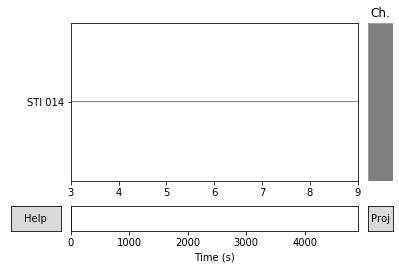

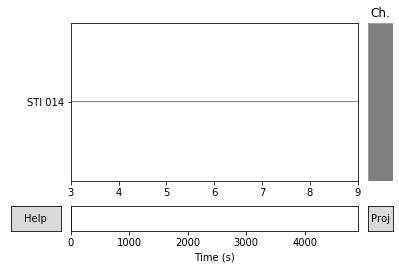

In [100]:
%matplotlib inline
raws[0].copy().pick_types(meg=False, stim=True).plot(start=3, duration=6)